In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Подгрузим наши данные из соревнования

DATA_DIR = '../input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [46]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [35]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102,0,0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443,0,0


In [36]:
sample_submission.head(2)

,reviewer_score,id
0,8.510,488440
1,8.084,274649


In [37]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewer_score  128935 non-null  float64
 1   id              128935 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 2.0 MB


In [8]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

/var/folders/cw/lkg_jfcj76df4km_0zwydjnc0000gn/T/ipykernel_60358/447817491.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем


In [ ]:
data.info()

In [9]:
data['lat'] = data['lat'].fillna(0, inplace=True)
data['lng'] = data['lng'].fillna(0, inplace=True)

In [10]:
data.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                                1
lng                                                1
sample                                             2
reviewer_score                                    38
dtype: int64

<AxesSubplot:>

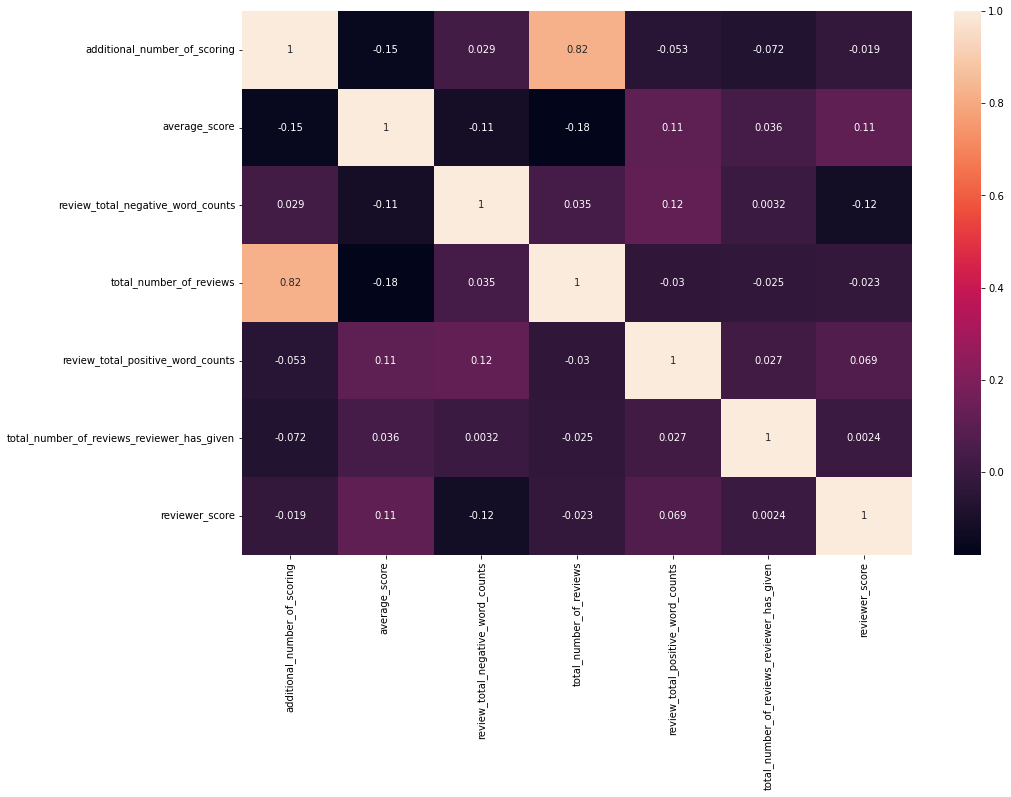

In [11]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

# Моя работа над признаками

In [116]:
%pip install nltk
%pip install haversine

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.express as px
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
from haversine import haversine

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/a.plakidin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
# Функции обработки

def hotel_address_fe(addr_str):
    country, city = np.nan, np.nan
    dict_address_types = {'type01': ('United Kingdom'), 'type02': ()}

    addr_str = addr_str.split(' ')
    if ' '.join(addr_str[-2:]) in dict_address_types['type01']:
        country = ' '.join(addr_str[-2:])
        city = addr_str[-5]
        #zip_code = ' '.join(addr_str[-4: -2])
    elif addr_str[-1] in dict_address_types['type02']:
        pass
    else:
        country = addr_str[-1]
        city = addr_str[-2]

    return pd.Series([country, city])

def review_date_fe(date):
    high_mons = (5, 6, 7, 8, 9)
    date = pd.to_datetime(date)
    ishiseason = False

    quarter = date.quarter
    if date.month in high_mons: ishiseason = True

    return pd.Series([quarter, ishiseason])

def review_fe(review_str):
    neutral_words = ['no negative', 'nothing', 'n a', 'none', 'nil', 'no Positive']
    review_str = review_str.lower().strip(',.?! ')
    
    if review_str in neutral_words:
        compound = 0
    else:
        review_analyser = SentimentIntensityAnalyzer()
        review_scores = review_analyser.polarity_scores(review_str)
        compound = review_scores['compound']
    
    return compound

def distance_to_city_center(lat, lng, city):
    cities_center_coords = {'London': (51.509865, -0.118092), 'Paris': (48.864716, 2.349014), 'Milan': (45.464664, 9.188540), 'Amsterdam': (52.379189, 4.899431), 'Barcelona': (41.390205, 2.154007), 'Vienna': (48.210033, 16.363449)}
    
    if city in cities_center_coords.keys():
        distance = haversine(cities_center_coords[city], (lat, lng))
    else:
        distance = np.nan
    
    return distance

def tags_number(tags_str):
    return len(tags_str.split(','))

def distance_to_city_center_fillna(df):
    mask = df.isnull()['distance_to_city_center']
    for index, row in df[mask].iterrows():
        row = row.copy()
        mask2 = df['hotel_address_city'] == row.hotel_address_city
        df.loc[index, 'distance_to_city_center'] = df[mask2]['distance_to_city_center'].median()
    
    
    
    
 





def eda_hotels(df, istrain: bool = True):
    #Работа с признаком "hotel_address"
    #df[['hotel_addess_country', 'hotel_addess_city']] = df['hotel_address'].apply(hotel_address_fe)
    df[['hotel_address_country', 'hotel_address_city']] = df.apply(lambda x: hotel_address_fe(x['hotel_address']), axis = 1)

    #Работа с признаком "additional_number_of_scoring"


    #Работа с признаком "review_date"
    #df[['review_date_quarter', 'review_date_ishiseason']] = df['review_date'].apply(review_date_fe)
    df[['review_date_quarter', 'review_date_ishiseason']] = df.apply(lambda x: review_date_fe(x['review_date']), axis = 1)
    

    #Работа с признаком "hotel_name"
    #У признака 1492 уникальных значения. При использовании двоичного кодирования в датасет добавится 11 дополнительных бинарных прихнаков, что может повлиять на скорость работы модели. Но пока не известно на сколько изменится скорость работы модели, поэтому не будем сокращать количество значений признака путем ввода значения other для низкочастсных значений

    #Работа с признаком "reviewer_nationality"
    #У признака 225 уникальных значения. При использовании двоичного кодирования в датасет добавится 8 дополнительных бинарных прихнаков. Пока оставляем все значения.


    #Работа с признаком "negative_review"
    #df['negative_review_compound'] = df['negative_review'].apply(review_fe)
    df['negative_review_compound'] = df.apply(lambda x: review_fe(x['negative_review']), axis = 1)


    #Работа с признаком "positive_review"
    #df['positive_review_compound'] = df['positive_review'].apply(review_fe)
    df['positive_review_compound'] = df.apply(lambda x: review_fe(x['positive_review']), axis = 1)


    #Работа с признаками lat, lng
    df['distance_to_city_center'] = df.apply(lambda x: distance_to_city_center(x['lat'], x['lng'], x['hotel_address_city']), axis=1)
    #distance_to_city_center_fillna(df)
    
    
    #Работа с признаками tags
    #df['tags_number'] = df['tags'].apply(tags_number)
    df['tags_number'] = df.apply(lambda x: tags_number(x['tags']), axis =1)

    #Удаление обработанных признаков
    #processed_cols = ['review_date', 'negative_review', 'positive_review', 'lat', 'lng', 'tags', 'days_since_review']
    #df.drop(processed_cols, axis = 1, inplace=True)


In [12]:
df_temp = df_train.copy()
#df_temp = df_train.iloc[-5:]


#Применение изменений к датасетам
eda_hotels(df = df_temp)

df_temp.info()
display(df_temp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 25 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,lat,lng,hotel_address_country,hotel_address_city,review_date_quarter,review_date_ishiseason,negative_review_compound,positive_review_compound,distance_to_city_center,tags_number
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,51.507894,-0.143671,United Kingdom,London,1,False,0.0000,0.5859,1.783738,5
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,51.521009,-0.123097,United Kingdom,London,1,False,-0.4767,0.0000,1.286585,4
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,48.845377,2.325643,France,Paris,4,False,-0.2960,0.3400,2.747328,5
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,48.888697,2.394540,France,Paris,3,True,0.0000,0.9169,4.265596,4
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,52.385601,4.847060,Netherlands,Amsterdam,1,False,-0.2500,0.8503,3.625357,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,...,51.494028,-0.191050,United Kingdom,London,2,False,0.0000,0.0000,5.348175,5
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,48.192379,16.399451,Austria,Vienna,1,False,0.0000,0.7264,3.312553,5
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,51.520795,-0.131084,United Kingdom,London,1,False,0.0000,0.7845,1.511705,4
386801,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,51.515125,-0.160066,United Kingdom,London,2,True,0.0000,0.0000,2.962935,4


LondonParisAmsterdamMilanViennaBarcelona: nan


In [13]:
cities = ['London', 'Paris', 'Amsterdam', 'Milan', 'Vienna', 'Barcelona']

for city in cities:
    print(f"{city}: {df_temp[df_temp['hotel_address_city'] == city]['distance_to_city_center'].median()}")

London: 3.2303712620062925
Paris: 2.46122786391686
Amsterdam: 2.3827832162027685
Milan: 2.3146597418401775
Vienna: 1.3877259326379094
Barcelona: 1.6318080658765783


In [14]:
distance_to_city_center_fillna(df_temp)

for city in cities:
    print(f"{city}: {df_temp[df_temp['hotel_address_city'] == city]['distance_to_city_center'].median()}")

London: 3.2303712620062925
Paris: 2.46122786391686
Amsterdam: 2.3827832162027685
Milan: 2.3146597418401775
Vienna: 1.3877259326379094
Barcelona: 1.6318080658765783


In [17]:
df_temp.to_csv('df_temp.csv')

In [ ]:
text_analyser = SentimentIntensityAnalyzer()

rev1 = 'Everything was good until January 10th We went back hotel and found our door was open We are shocked and immediately ask the reception what did happen But the altitude of the Stuff is awful He was impatient and even didn t want to solve the problem I was shocked Really disgusting'
rev2 = 'Cleanliness'
rev3 = ' .    Small room ??      '
rev = rev2


print(text_analyser.polarity_scores(rev))
print(review_fe(rev))

In [11]:
print(distance_to_city_center(51.507894, -0.143671, 'Paris'))
print(df_temp['hotel_addess_city'].unique())

343.2872257165002
['London' 'Paris' 'Amsterdam' 'Milan' 'Vienna' 'Barcelona']


In [6]:
df_temp['hotel_address_city'] = 'London'
df_temp.loc[386800:, 'distance_to_city_center'] = np.nan
display(df_temp)

/var/folders/cw/lkg_jfcj76df4km_0zwydjnc0000gn/T/ipykernel_15442/124147547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['hotel_address_city'] = 'London'


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,lat,lng,hotel_address_country,hotel_address_city,review_date_quarter,review_date_ishiseason,negative_review_compound,positive_review_compound,distance_to_city_center,tags_number
386798,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,...,51.494028,-0.191050,United Kingdom,London,2,False,0.0,0.0000,5.348175,5
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,48.192379,16.399451,Austria,London,1,False,0.0,0.7264,3.312553,5
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,51.520795,-0.131084,United Kingdom,London,1,False,0.0,0.7845,NaN,4
386801,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,51.515125,-0.160066,United Kingdom,London,2,True,0.0,0.0000,NaN,4
386802,25 Courtfield Gardens Kensington and Chelsea L...,222,8/5/2016,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,...,51.493109,-0.190208,United Kingdom,London,3,True,0.0,0.9366,NaN,4


In [7]:
mask = df_temp.isnull()['distance_to_city_center']




for i, row in df_temp[mask].iterrows():
    #display(i)
    #display(row)
    row = row.copy()

    mask2 = df_temp['hotel_address_city'] == row.hotel_address_city
    df_temp.loc[i, 'distance_to_city_center'] = df_temp[mask2]['distance_to_city_center'].median()
    
    

display(df_temp)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,lat,lng,hotel_address_country,hotel_address_city,review_date_quarter,review_date_ishiseason,negative_review_compound,positive_review_compound,distance_to_city_center,tags_number
386798,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,...,51.494028,-0.191050,United Kingdom,London,2,False,0.0,0.0000,5.348175,5
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,48.192379,16.399451,Austria,London,1,False,0.0,0.7264,3.312553,5
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,51.520795,-0.131084,United Kingdom,London,1,False,0.0,0.7845,4.330364,4
386801,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,51.515125,-0.160066,United Kingdom,London,2,True,0.0,0.0000,4.330364,4
386802,25 Courtfield Gardens Kensington and Chelsea L...,222,8/5/2016,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,...,51.493109,-0.190208,United Kingdom,London,3,True,0.0,0.9366,4.330364,4


In [37]:
df_tmp = df_train.iloc[0:5]

#display(tags_number("[' Business trip ', ' Couple ', ' Standard Dou ', ' Standard Dou ']"))

df_tmp['tags_number'] = df_tmp['tags'].apply(tags_number)

df_tmp['hotel_address_city'] = 'London'
df_tmp['hotel_address_city'] = 'London'

/var/folders/cw/lkg_jfcj76df4km_0zwydjnc0000gn/T/ipykernel_99510/70193416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['tags_number'] = df_tmp['tags'].apply(tags_number)


,tags,tags_number
0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",5
1,"[' Business trip ', ' Couple ', ' Standard Dou...",4
2,"[' Leisure trip ', ' Solo traveler ', ' Modern...",5
3,"[' Leisure trip ', ' Solo traveler ', ' Standa...",4
4,"[' Business trip ', ' Couple ', ' Standard Dou...",4


In [38]:
fig02_data = df_train.groupby(['hotel_name'], as_index=False)['hotel_address'].count()
fig02_data.rename(columns={'hotel_address': 'Count'}, inplace = True)
fig02_data.sort_values(by='Count', ascending=False, inplace=True)
display(fig02_data)

fig02 = px.bar(
    fig02_data,
    x='hotel_name',
    y='Count',
    text='Count',
    height=1000, width=1500,
    #title='Распределение клиентов по количеству услуг',
    #labels={'NumOfProducts': 'Количество услуг', 'Count': 'Число клиентов', 'Status': 'Статус клиента'}
)
fig02.show()

,hotel_name,Count
185,Britannia International Hotel Canary Wharf,3587
1290,Strand Palace Hotel,3206
1146,Park Plaza Westminster Bridge London,3095
241,Copthorne Tara Hotel London Kensington,2688
282,DoubleTree by Hilton Hotel London Tower of London,2379
...,...,...
1198,Renaissance Paris Republique Hotel Spa,7
820,Ibis Styles Milano Palmanova,7
638,Hotel Gallitzinberg,6
791,Hotel Wagner,6


In [41]:
fig03_data = df_train.groupby(['reviewer_nationality'], as_index=False)['hotel_address'].count()
fig03_data.rename(columns={'hotel_address': 'Count'}, inplace = True)
fig03_data.sort_values(by='Count', ascending=False, inplace=True)
display(fig03_data)

fig03 = px.bar(
    fig03_data,
    x='reviewer_nationality',
    y='Count',
    text='Count',
    height=1000, width=1500,
    #title='Распределение клиентов по количеству услуг',
    #labels={'NumOfProducts': 'Количество услуг', 'Count': 'Число клиентов', 'Status': 'Статус клиента'}
)
fig03.show()

,reviewer_nationality,Count
213,United Kingdom,184033
215,United States of America,26541
14,Australia,16239
97,Ireland,11126
212,United Arab Emirates,7617
...,...,...
208,Tuvalu,1
81,Grenada,1
193,Svalbard Jan Mayen,1
153,Palau,1


In [112]:
df_train['positive_review'].value_counts(ascending=False).to_csv('temp.csv')

# Кусок от Бэйслайна

In [15]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 8 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   sample                                      515738 non-null  int64  
 7   reviewer_score                              515738 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 31.5 MB


In [19]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [20]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [21]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 7), (386803, 7), (386803, 6), (309442, 6), (77361, 6))

In [22]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [23]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [24]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   47.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.6s finished


In [25]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.9822361453527125


<AxesSubplot:>

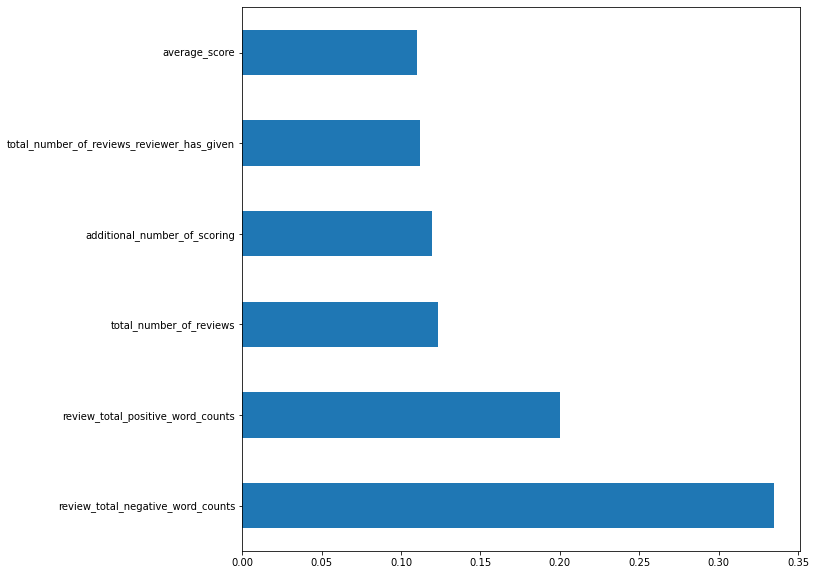

In [26]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [27]:
test_data.sample(10)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score
112056,40,9.1,30,177,56,1,0.0
97002,94,9.2,10,742,5,1,0.0
4414,168,8.2,34,1579,10,15,0.0
62341,879,8.8,7,2768,3,1,0.0
84973,226,8.1,0,1957,80,6,0.0
38473,803,8.4,13,3911,30,1,0.0
82756,346,9.0,2,1283,25,1,0.0
124432,34,8.8,0,156,10,7,0.0
32676,211,8.9,27,1517,36,3,0.0
74837,106,9.0,7,855,5,4,0.0


In [28]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [30]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [29]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    5.5s finished


In [31]:
predict_submission

array([8.51  , 8.084 , 7.968 , ..., 8.426 , 9.617 , 7.9375])

In [32]:
list(sample_submission)

['reviewer_score', 'id']

In [33]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.510000,488440
1,8.084000,274649
2,7.968000,374688
3,9.524000,404352
4,9.418664,451596
5,8.833000,302161
6,6.839000,317079
7,7.826000,13963
8,9.133000,159785
9,8.095000,195089
